In [1]:
import os

import numpy as np
from atmosphere import Atmosphere
from spectrum import Spectrum
from TCWret import TCWret

In [2]:
path_tcwret = "/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/"
retrieval = TCWret(path="./OUTFOLDER", \
                   results="./RESULTS", \
                   lblrtm=os.path.join(path_tcwret, "rtm/lblrtm"), \
                   run_lblrtm="/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/run_LBLRTM", \
                   lbldis="/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/rtm/lbldis", \
                   run_lbldis="/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/run_LBLDIS", \
                   resolution=0.3, \
                   lm_init=100.0, \
                   lm_decr=2.0, \
                   lm_incr=4.0, \
                   kurucz_db="/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/solar/solar.kurucz.rad.1cm-1binned.full_disk.asc", \
                   ssp_db=['/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/ssp_database/ssp_db.mie_wat.gamma_sigma_0p100', \
'/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/ssp_database/ssp_db.Droxtal.gamma.0p100'], 
                   ssp_temp=[[233.15, 500.15], [0.0, 273.15]], \
                   tau=[.25, .25], 
                   reff=[np.log(5.), np.log(20.)], \
                   var_tau=[0.04, 0.04], \
                   var_reff = [np.log(100.0)**(-2), np.log(100.0)**(-2)], \
                   log_reff=True, cemiss=True)

In [3]:
retrieval.microwindows([[558.5, 562.0], [571.0, 574.0], [785.9, 790.7], \
                        [809.0, 812.9], \
                        [815.3, 824.4], \
                        [828.3, 834.6], \
                        [842.8, 848.1], \
                        [860.1, 864.0], \
                        [872.2, 877.5], \
                        [891.9, 895.8], \
                        [898.2, 905.4], \
                        [929.6, 939.7], \
                        [959.9, 964.3], \
                        [985.0, 998.0], \
                        [1092.1, 1098.8], \
                        [1113.3, 1116.6], \
                        [1124.4, 1132.6], \
                        [1142.2, 1148.0], \
                        [1155.2, 1163.4]])

In [4]:
spec = Spectrum("input/radiance/PS.20170611.nc", index_of_spec=111)
spec.average_radiance_per_windows(retrieval.return_microwindows())
spectrum = spec.return_spectrum()
spectrum['datetime'], spectrum['latitude'], spectrum['longitude']

(datetime.datetime(2017, 6, 11, 14, 13), 81.830007, 11.188357)

In [5]:
path = "/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/"
atmo = Atmosphere(time = spectrum['datetime'], \
                  lat  = spectrum['latitude'], \
                  lon  = spectrum['longitude'], \
                  co2  = os.path.join(path, "co2.csv"), \
                  co   = os.path.join(path, "co.csv"), \
                  ch4  = os.path.join(path, "ch4.csv"), \
                  n2o  = os.path.join(path, "n2o.csv"), \
                  o2   = os.path.join(path, "o2.csv"), \
                  o3   = os.path.join(path, "o3.csv"), \
                  z    = os.path.join(path, "z.csv"))
date = spectrum['datetime']
lat = spectrum['latitude']
lon = spectrum['longitude']
atm_file = "ERA5_{:04d}{:02d}{:02d}_{:02d}{:02d}{:02d}_{:.2f}_{:.2f}.nc".format(date.year, \
                                                                                                  date.month, \
                                                                                                  date.day, \
                                                                                                  date.hour, \
                                                                                                  date.minute, \
                                                                                                  date.second, \
                                                                                                  int(lat+1), \
                                                                                                  int(lat-1), \
                                                                                                  int(lon+1), \
                                                                                                  int(lon-1))
cloud_file = "cbh_{:04d}{:02d}{:02d}_{:02d}{:02d}{:02d}_{:.2f}_{:.2f}.nc".format(date.year, \
                                                                                                  date.month, \
                                                                                                  date.day, \
                                                                                                  date.hour, \
                                                                                                  date.minute, \
                                                                                                  date.second, \
                                                                                                  int(lat+1), \
                                                                                                  int(lat-1), \
                                                                                                  int(lon+1), \
                                                                                                  int(lon-1))
atmo.download_atmosphere(atm_file)
atmo.download_cloud_position(cloud_file)
atmo.create_atmosphere(atm_file)
atmo.read_cloud_height(fname=cloud_file)
#atmo.plot_atmosphere()

2021-08-27 18:32:19,947 INFO Welcome to the CDS
2021-08-27 18:32:19,950 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2021-08-27 18:32:20,032 INFO Request is queued
2021-08-27 18:50:40,302 INFO Request is running
2021-08-27 18:52:40,562 INFO Request is completed
2021-08-27 18:52:40,564 INFO Downloading https://download-0000.copernicus-climate.eu/cache-compute-0000/cache/data7/adaptor.mars.internal-1630083047.5544822-11701-5-a61f08a9-390a-4348-9ac6-ce73686f7123.nc to ERA5_20170611_141300_82.00_80.00.nc (31.8K)
2021-08-27 18:52:40,842 INFO Download rate 115.4K/s
2021-08-27 18:52:40,921 INFO Welcome to the CDS
2021-08-27 18:52:40,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2021-08-27 18:52:41,002 INFO Request is queued
2021-08-27 19:11:01,217 INFO Request is completed
2021-08-27 19:11:01,220 INFO Downloading https://download-0007.copernicus-climate.eu/cache-compute

In [6]:
atmosphere = atmo.return_atmosphere()

In [7]:
retrieval.add_spectrum(spectrum)
retrieval.add_atmosphere(atmosphere)
retrieval.prepare_retrieval()
mcp = retrieval.get_mcp()

In [8]:
retrieval.set_mcp(np.array([0., 0., np.log(5.), np.log(20.)]))
retrieval.run_LBLDIS(clear_sky=True)
retrieval.set_mcp(mcp)

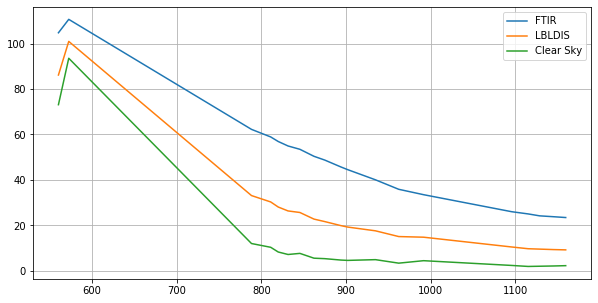

In [9]:
for i in range(30):
    retrieval.set_mcp(mcp)
    if np.where(mcp < 0.0)[0].size == 0:
        retrieval.run_LBLDIS(clear_sky=False)
        retrieval.run_LBLDIS_deriv()
        retrieval.calculate_cloud_emissivity()
        if i == 0:
            retrieval.plot_spectrum()
        retrieval.jacobian()
        retrieval.calc_chi_2_and_residuum()
        if retrieval.convergence():
            break
    retrieval.adjust_lm()
    retrieval.optimal_estimation()
    retrieval.adjust_mcp()
    mcp = retrieval.get_mcp()

[0.61977454 0.93725145 1.81086975 3.23947304]


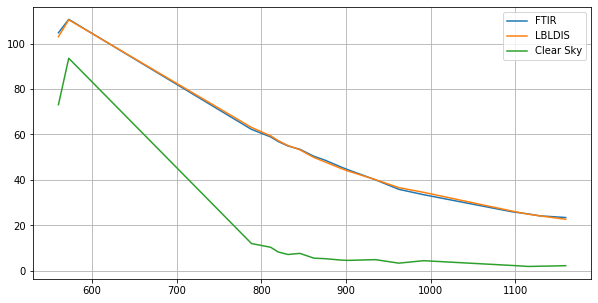

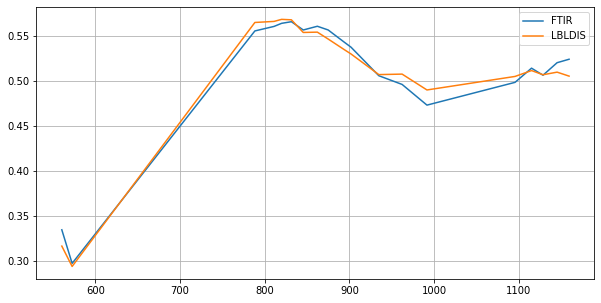

(0.5076663242826798, 0.5092754532809606)

In [10]:
print(mcp)
retrieval.plot_spectrum()
retrieval.plot_emissivity()
np.mean(retrieval.get_spectrum()['emissivity_lbl']), np.mean(retrieval.get_spectrum()['emissivity_ftir'])